In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px

!pip install dataprep
from dataprep.eda import create_report

!pip install h2o
import h2o
from h2o.automl import H2OAutoML

     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 1.3 MB 35.7 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 366 kB 70.9 MB/s 
     |████████████████████████████████| 719 kB 55.1 MB/s 
     |████████████████████████████████| 10.1 MB 28.0 MB/s 
     |████████████████████████████████| 1.5 MB 51.4 MB/s 
     |████████████████████████████████| 848 kB 22.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 160 kB 31.2 MB/s 
     |████████████████████████████████| 271 kB 54.8 MB/s 
     |████████████████████████████████| 125 kB 70.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 44.7 MB/s 
     |████████████████████████████████| 743 kB 38.0 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=ef9527587f998b34fa81ce5ccc78806e520aa4ebf2c39ab

NumExpr defaulting to 2 threads.


     |████████████████████████████████| 175.8 MB 29 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=e6dfa49d206e615fdbd72c8df3d83dfdbf90a5b23921769ea9fcbc98040acbdf
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [2]:
#read data
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
#preview
cancer_df.head(10)

Age Number of sexual partners  ... Citology Biopsy
0   18                       4.0  ...        0      0
1   15                       1.0  ...        0      0
2   34                       1.0  ...        0      0
3   52                       5.0  ...        0      0
4   46                       3.0  ...        0      0
5   42                       3.0  ...        0      0
6   51                       3.0  ...        0      1
7   26                       1.0  ...        0      0
8   45                       1.0  ...        0      0
9   44                       3.0  ...        0      0

[10 rows x 36 columns]

# Exploratory Data Analysis

In [4]:
#info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#statistics
cancer_df.describe()

Age  STDs: Number of diagnosis  ...    Citology      Biopsy
count  858.000000                 858.000000  ...  858.000000  858.000000
mean    26.820513                   0.087413  ...    0.051282    0.064103
std      8.497948                   0.302545  ...    0.220701    0.245078
min     13.000000                   0.000000  ...    0.000000    0.000000
25%     20.000000                   0.000000  ...    0.000000    0.000000
50%     25.000000                   0.000000  ...    0.000000    0.000000
75%     32.000000                   0.000000  ...    0.000000    0.000000
max     84.000000                   3.000000  ...    1.000000    1.000000

[8 rows x 10 columns]

In [6]:
#replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df.head()

Age Number of sexual partners  ... Citology Biopsy
0   18                       4.0  ...        0      0
1   15                       1.0  ...        0      0
2   34                       1.0  ...        0      0
3   52                       5.0  ...        0      0
4   46                       3.0  ...        0      0

[5 rows x 36 columns]

In [7]:
#look at null
cancer_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

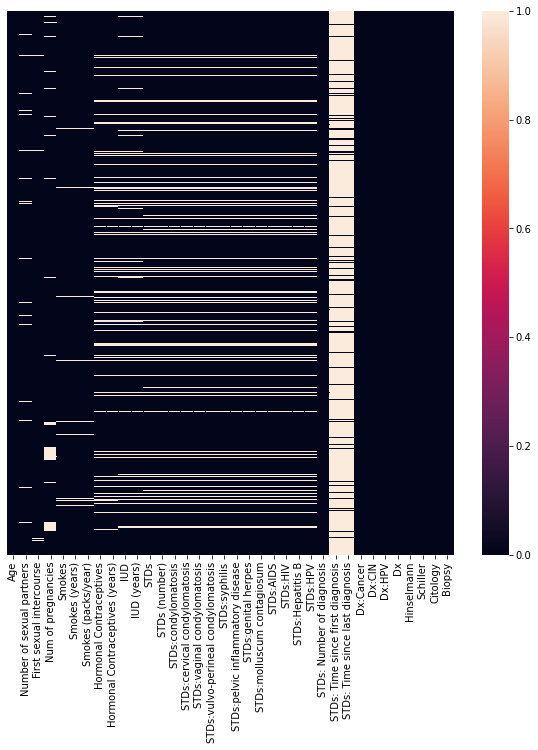

In [8]:
#plot heatmap for all locations that have null values
plt.figure(figsize = (10, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [9]:
#since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
#we can drop them
cancer_df = cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df.head()

Age Number of sexual partners  ... Citology Biopsy
0   18                       4.0  ...        0      0
1   15                       1.0  ...        0      0
2   34                       1.0  ...        0      0
3   52                       5.0  ...        0      0
4   46                       3.0  ...        0      0

[5 rows x 34 columns]

In [10]:
#Other tests can suggest that cancer is present, 
#but only a biopsy can make a definite diagnosis.
#We will remove all other diagnosis and tests
cancer_df = cancer_df.drop(columns=['Hinselmann', 'Schiller', 'Citology'], axis=1)
cancer_df.head()

Age Number of sexual partners First sexual intercourse  ... Dx:HPV Dx Biopsy
0   18                       4.0                     15.0  ...      0  0      0
1   15                       1.0                     14.0  ...      0  0      0
2   34                       1.0                      NaN  ...      0  0      0
3   52                       5.0                     16.0  ...      1  0      0
4   46                       3.0                     21.0  ...      0  0      0

[5 rows x 31 columns]

In [11]:
#since most of the column types are object, we are not able to get the statistics of the dataframe.
#convert them to numeric type
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [12]:
#statistics of the dataframe
cancer_df.describe()

Age  Number of sexual partners  ...          Dx      Biopsy
count  858.000000                 832.000000  ...  858.000000  858.000000
mean    26.820513                   2.527644  ...    0.027972    0.064103
std      8.497948                   1.667760  ...    0.164989    0.245078
min     13.000000                   1.000000  ...    0.000000    0.000000
25%     20.000000                   2.000000  ...    0.000000    0.000000
50%     25.000000                   2.000000  ...    0.000000    0.000000
75%     32.000000                   3.000000  ...    0.000000    0.000000
max     84.000000                  28.000000  ...    1.000000    1.000000

[8 rows x 31 columns]

In [13]:
#get average
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [14]:
#replace null values with mean
cancer_df = cancer_df.fillna(round(cancer_df.mean()))
cancer_df.head()

Age  Number of sexual partners  First sexual intercourse  ...  Dx:HPV  Dx  Biopsy
0   18                        4.0                      15.0  ...       0   0       0
1   15                        1.0                      14.0  ...       0   0       0
2   34                        1.0                      17.0  ...       0   0       0
3   52                        5.0                      16.0  ...       1   0       0
4   46                        3.0                      21.0  ...       0   0       0

[5 rows x 31 columns]

# Data Visualization

In [15]:
#correlation matrix
corr = cancer_df.corr()
corr

Age  ...    Biopsy
Age                                 1.000000  ...  0.055956
Number of sexual partners           0.083715  ... -0.002339
First sexual intercourse            0.369175  ...  0.007259
Num of pregnancies                  0.525892  ...  0.040215
Smokes                              0.057204  ...  0.028724
Smokes (years)                      0.217535  ...  0.061440
Smokes (packs/year)                 0.131861  ...  0.024487
Hormonal Contraceptives             0.029201  ... -0.018015
Hormonal Contraceptives (years)     0.280327  ...  0.081373
IUD                                 0.279429  ...  0.059231
IUD (years)                         0.195095  ...  0.026380
STDs                                0.025241  ...  0.114148
STDs (number)                      -0.001330  ...  0.103153
STDs:condylomatosis                -0.013751  ...  0.090164
STDs:cervical condylomatosis             NaN  ...       NaN
STDs:vaginal condylomatosis         0.009505  ... -0.017911
STDs:vulvo-perineal condylomatosis -0.011499  ...  0.092548
STDs:syphilis                       0.017457  ... -0.038311
STDs:pelvic inflammatory disease    0.024854  ... -0.008940
STDs:genital herpes                -0.027433  ...  0.130523
STDs:molluscum contagiosum          0.000722  ... -0.008940
STDs:AIDS                                NaN  ...       NaN
STDs:HIV                            0.005009  ...  0.127702
STDs:Hepatitis B                   -0.027433  ... -0.008940
STDs:HPV                            0.040861  ... -0.012650
STDs: Number of diagnosis          -0.001606  ...  0.097449
Dx:Cancer                           0.110340  ...  0.160905
Dx:CIN                              0.061443  ...  0.113172
Dx:HPV                              0.101722  ...  0.160905
Dx                                  0.092635  ...  0.157607
Biopsy                              0.055956  ...  1.000000

[31 rows x 31 columns]

In [16]:
#create report
#report = create_report(cancer_df, title='My Report')
#report

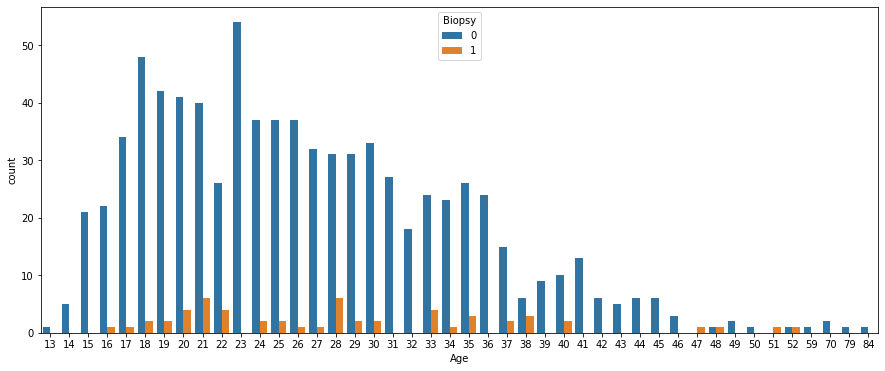

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Age'],
              hue=cancer_df['Biopsy'])

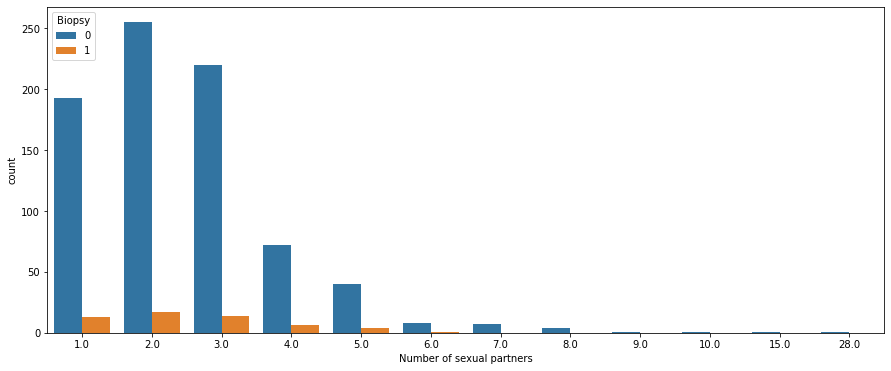

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Number of sexual partners'],
              hue=cancer_df['Biopsy'])

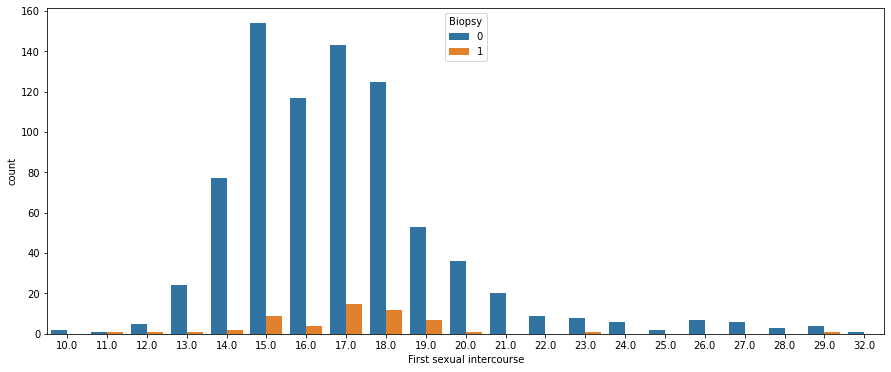

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['First sexual intercourse'],
              hue=cancer_df['Biopsy'])

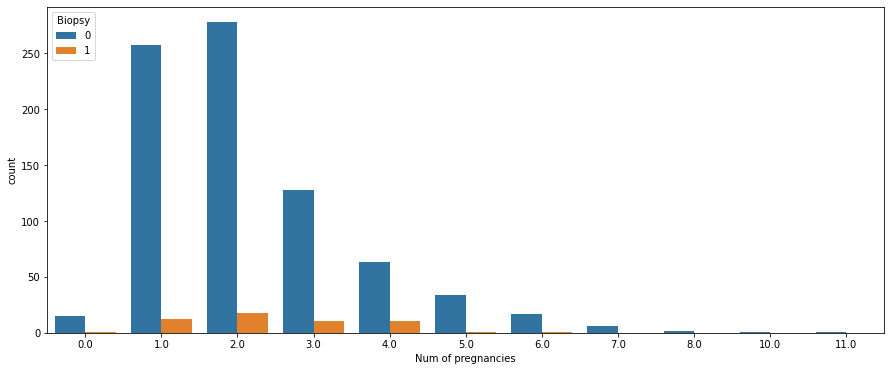

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Num of pregnancies'],
              hue=cancer_df['Biopsy'])

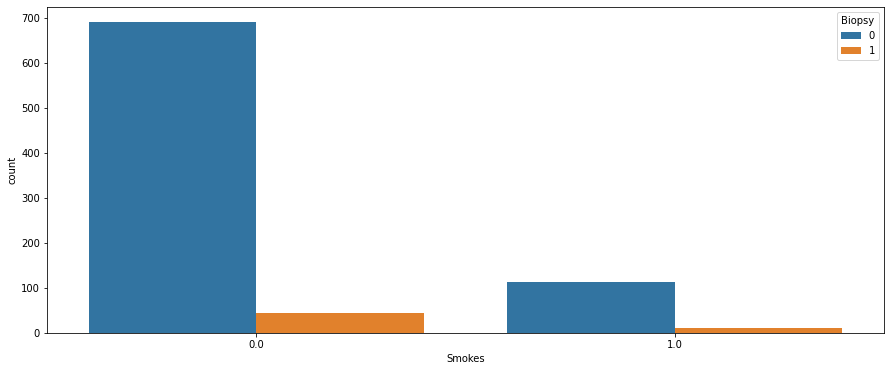

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Smokes'],
              hue=cancer_df['Biopsy'])

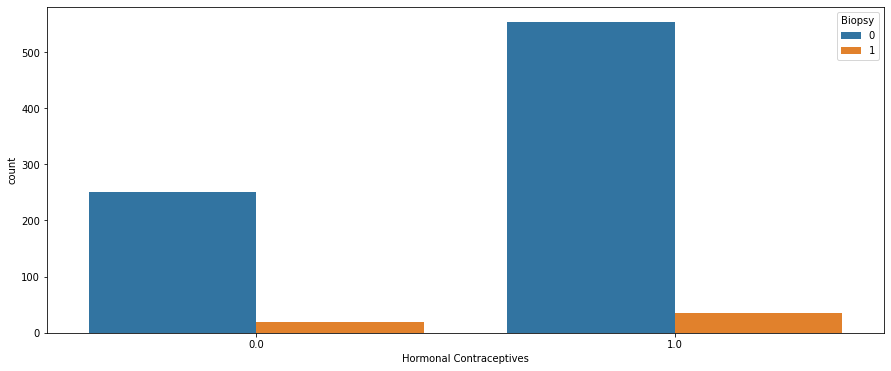

In [22]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Hormonal Contraceptives'],
              hue=cancer_df['Biopsy'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

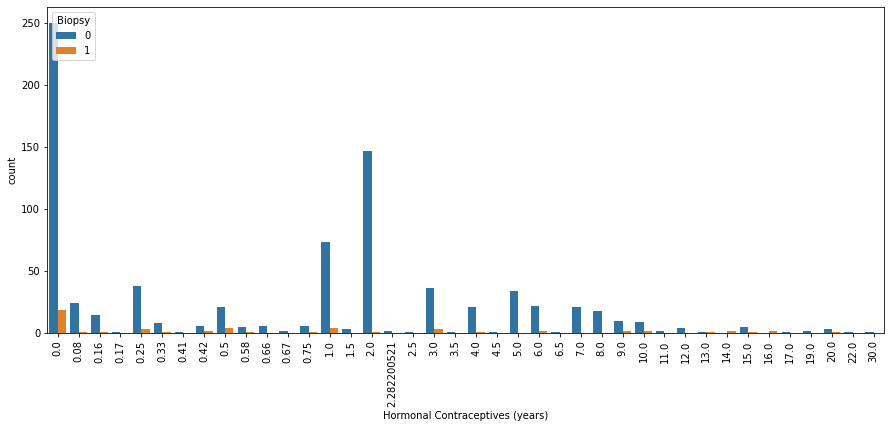

In [61]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Hormonal Contraceptives (years)'],
              hue=cancer_df['Biopsy'])
plt.xticks(rotation=90)

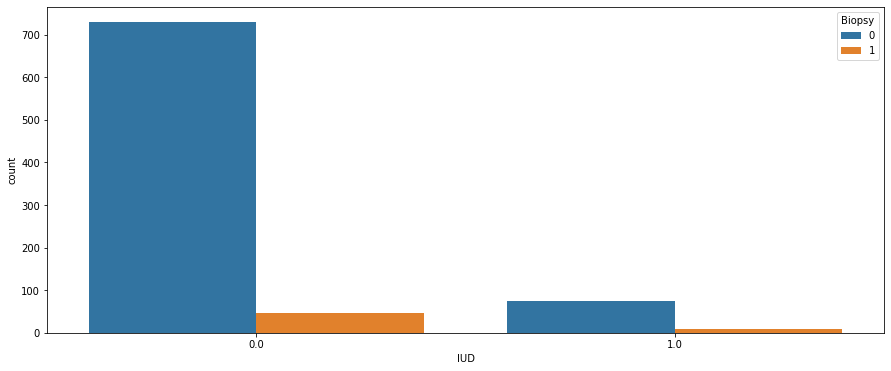

In [23]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['IUD'],
              hue=cancer_df['Biopsy'])

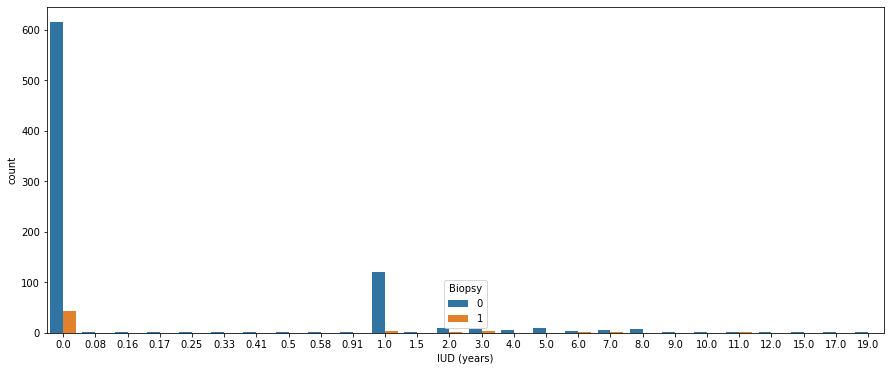

In [62]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['IUD (years)'],
              hue=cancer_df['Biopsy'])

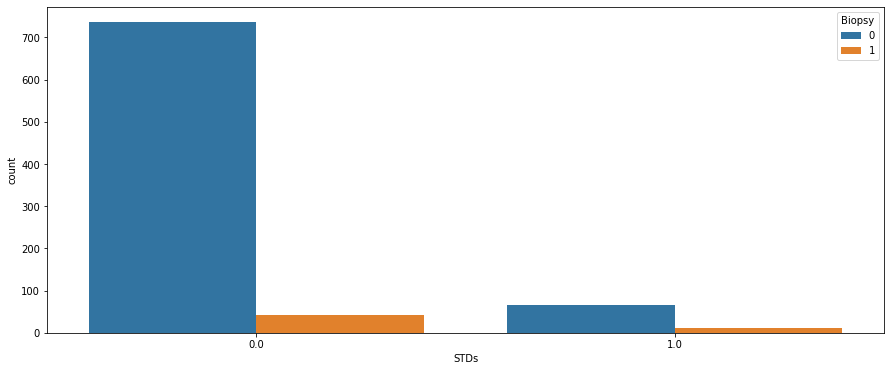

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['STDs'],
              hue=cancer_df['Biopsy'])

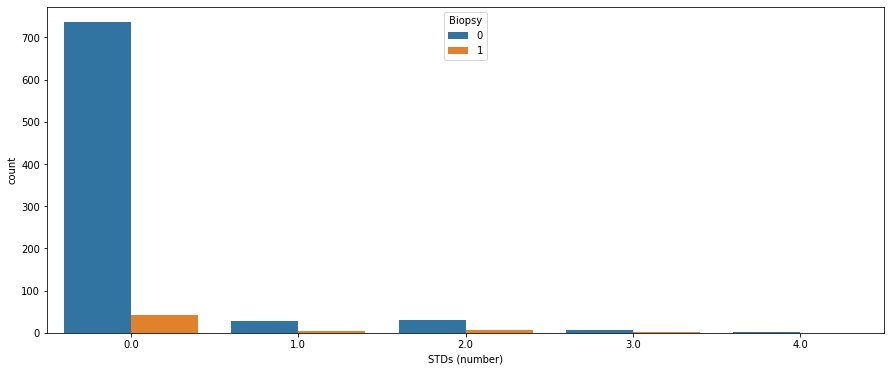

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['STDs (number)'],
              hue=cancer_df['Biopsy'])

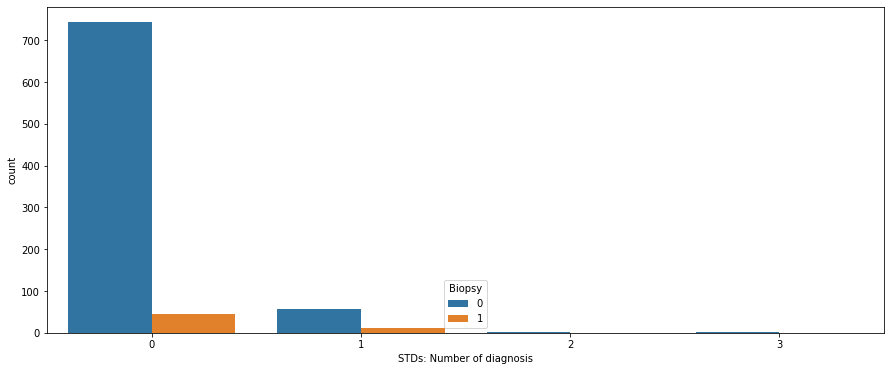

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['STDs: Number of diagnosis'],
              hue=cancer_df['Biopsy'])

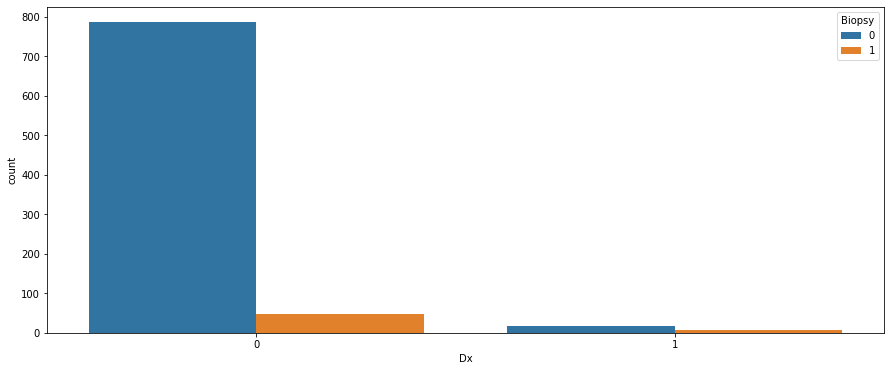

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Dx'],
              hue=cancer_df['Biopsy'])

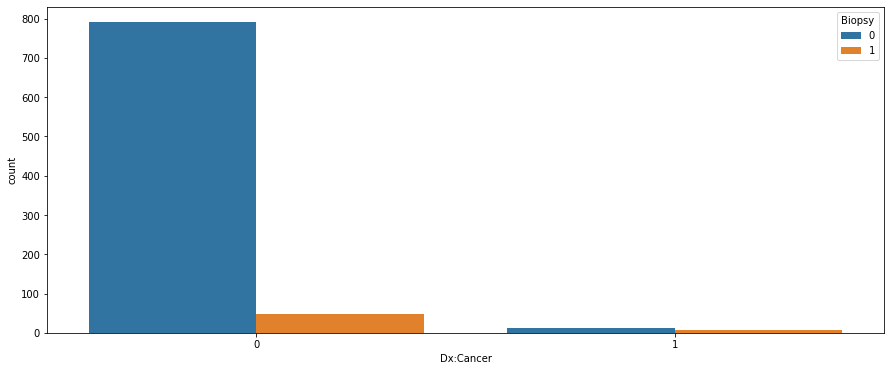

In [28]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Dx:Cancer'],
              hue=cancer_df['Biopsy'])

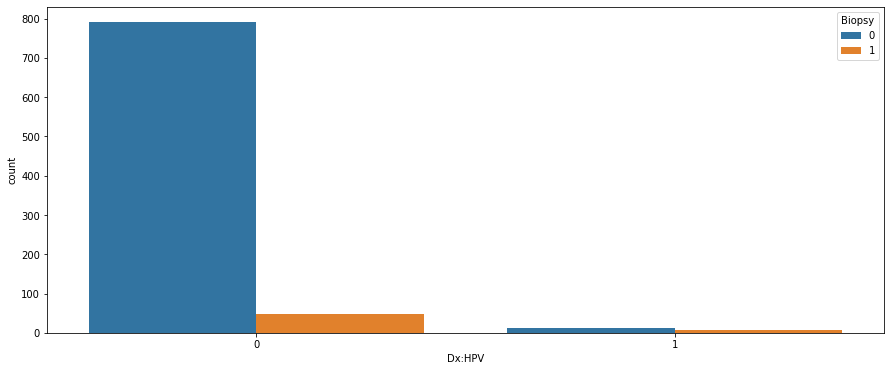

In [29]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Dx:HPV'],
              hue=cancer_df['Biopsy'])

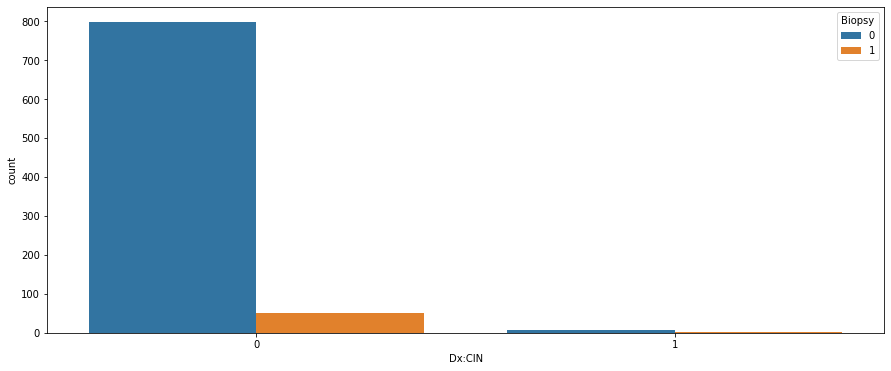

In [30]:
plt.figure(figsize=(15, 6))
sns.countplot(x=cancer_df['Dx:CIN'],
              hue=cancer_df['Biopsy'])

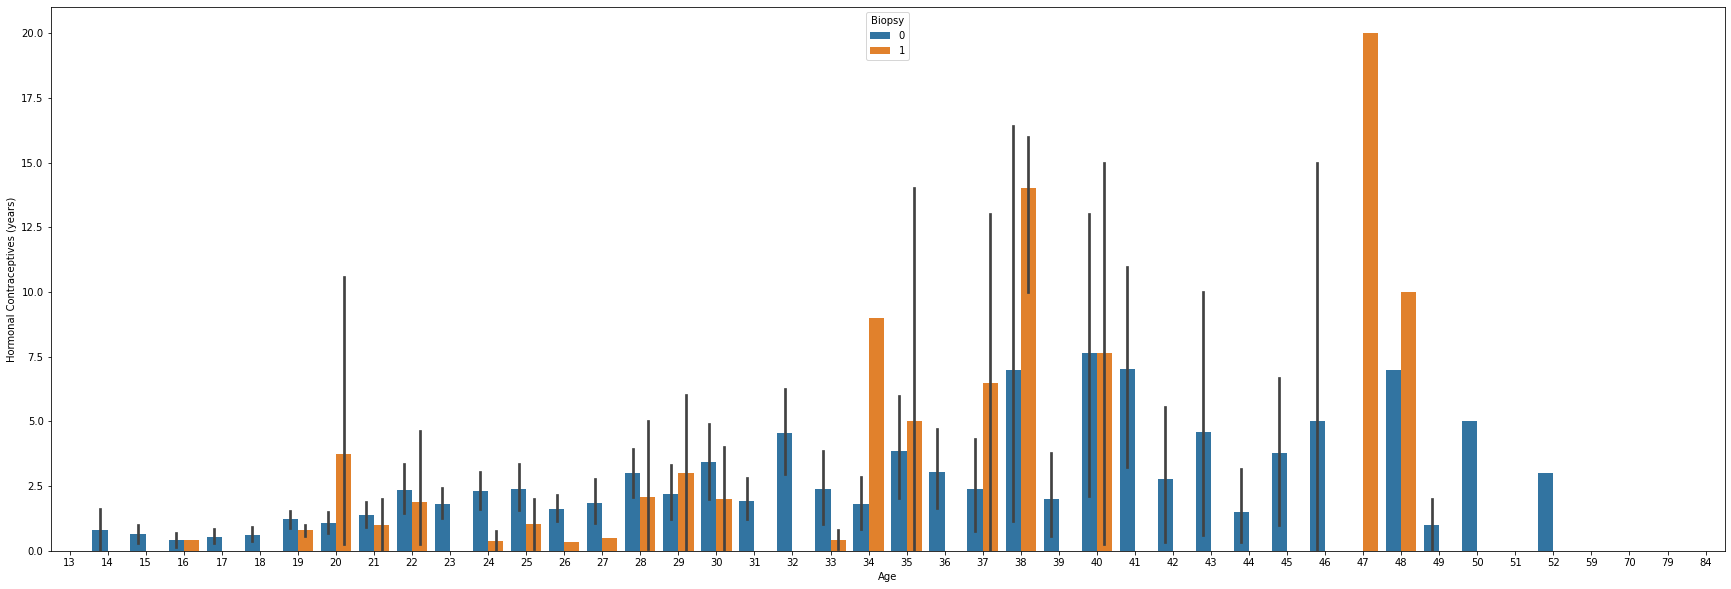

In [91]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="Hormonal Contraceptives (years)", hue="Biopsy",
                    data=cancer_df);

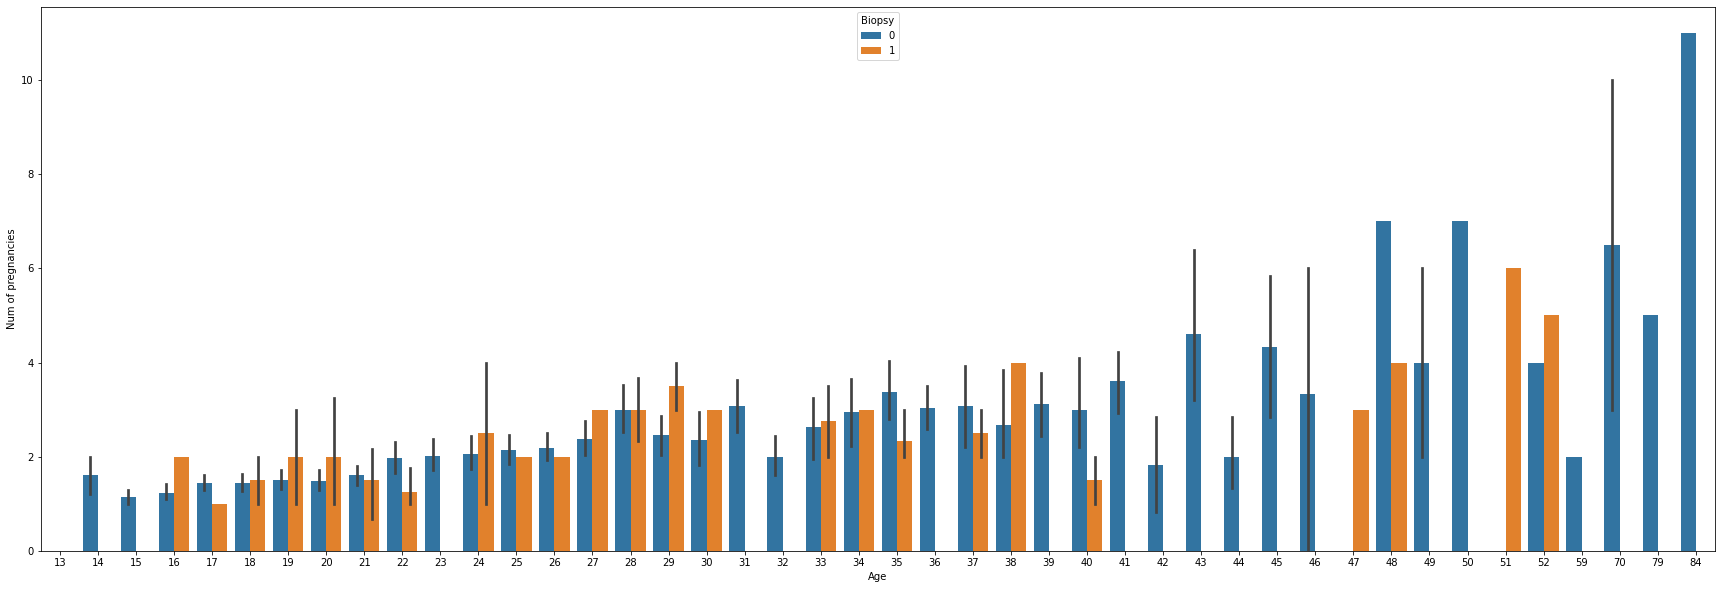

In [97]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="Num of pregnancies", hue="Biopsy",
                    data=cancer_df);

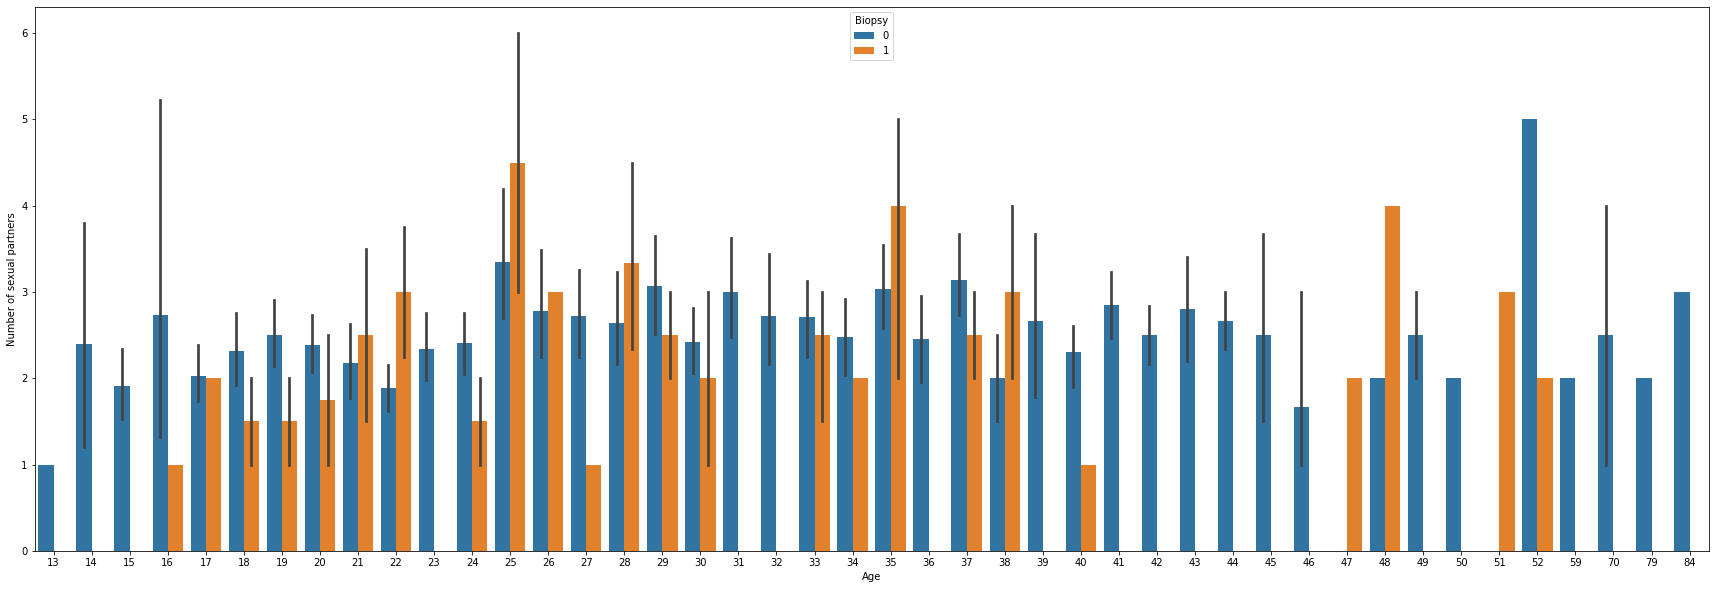

In [76]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="Number of sexual partners", hue="Biopsy",
                    data=cancer_df);

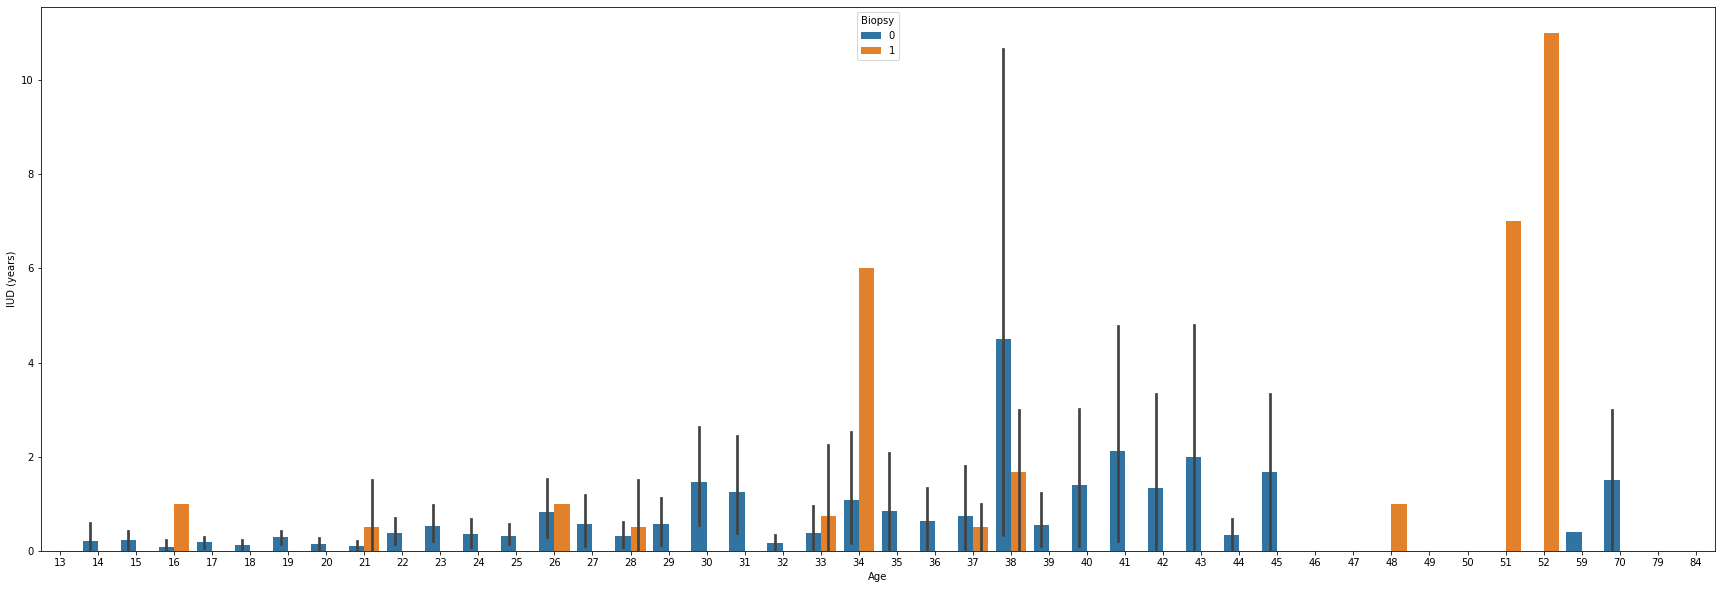

In [79]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="IUD (years)", hue="Biopsy",
                    data=cancer_df);

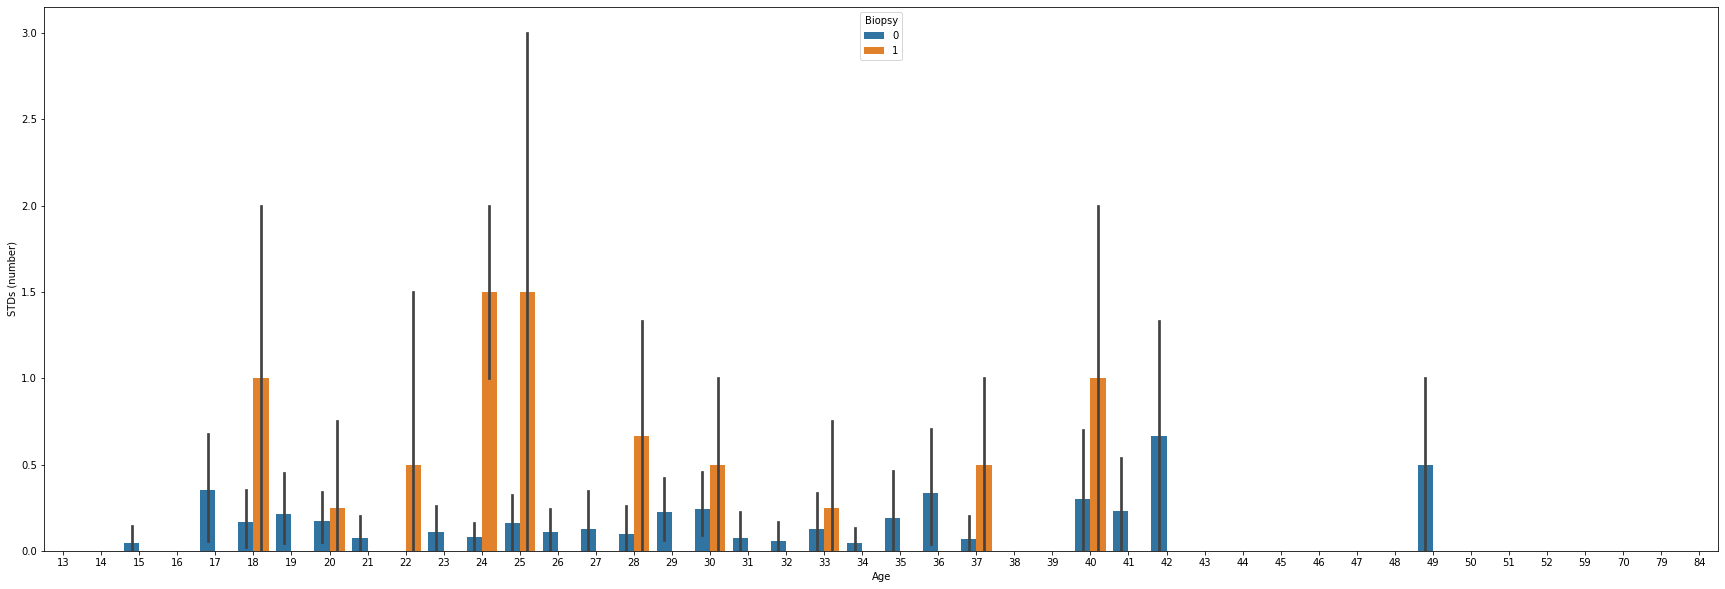

In [80]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="STDs (number)", hue="Biopsy",
                    data=cancer_df);

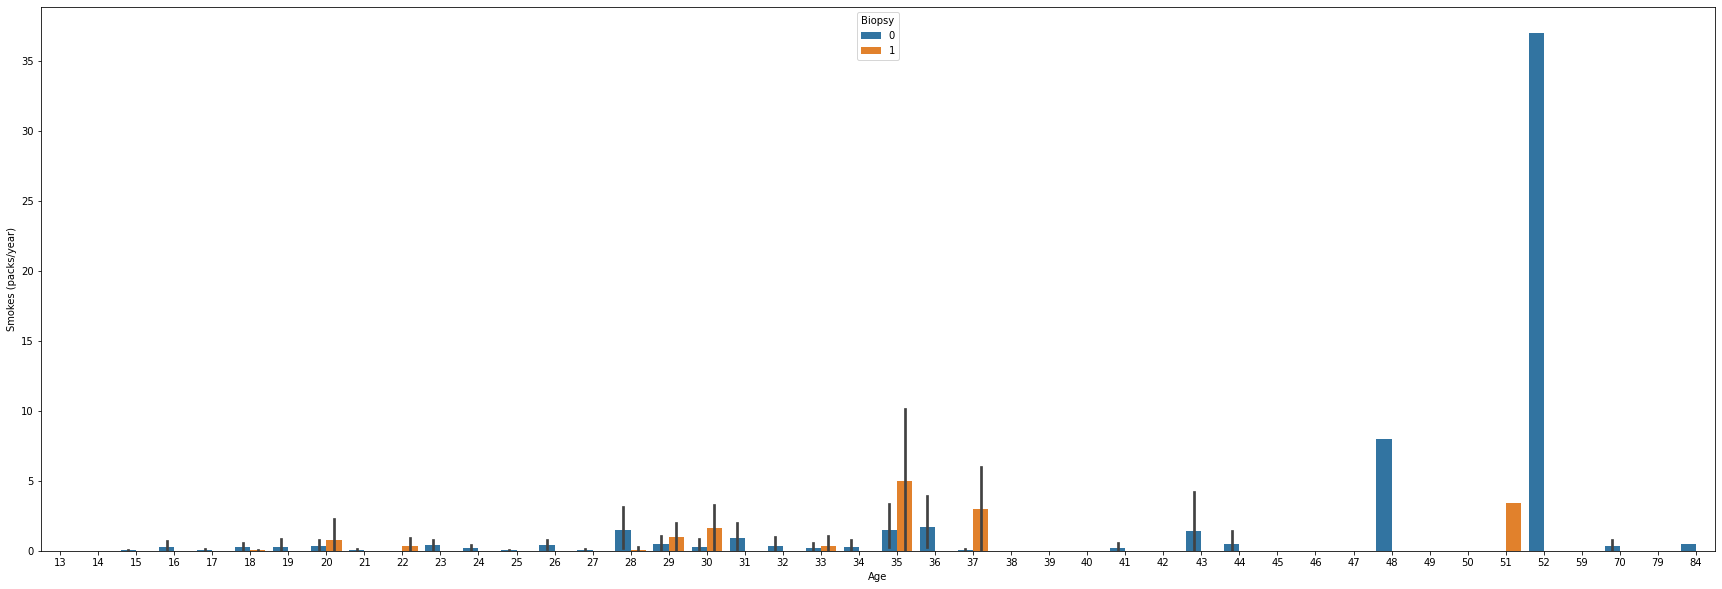

In [81]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="Smokes (packs/year)", hue="Biopsy",
                    data=cancer_df);

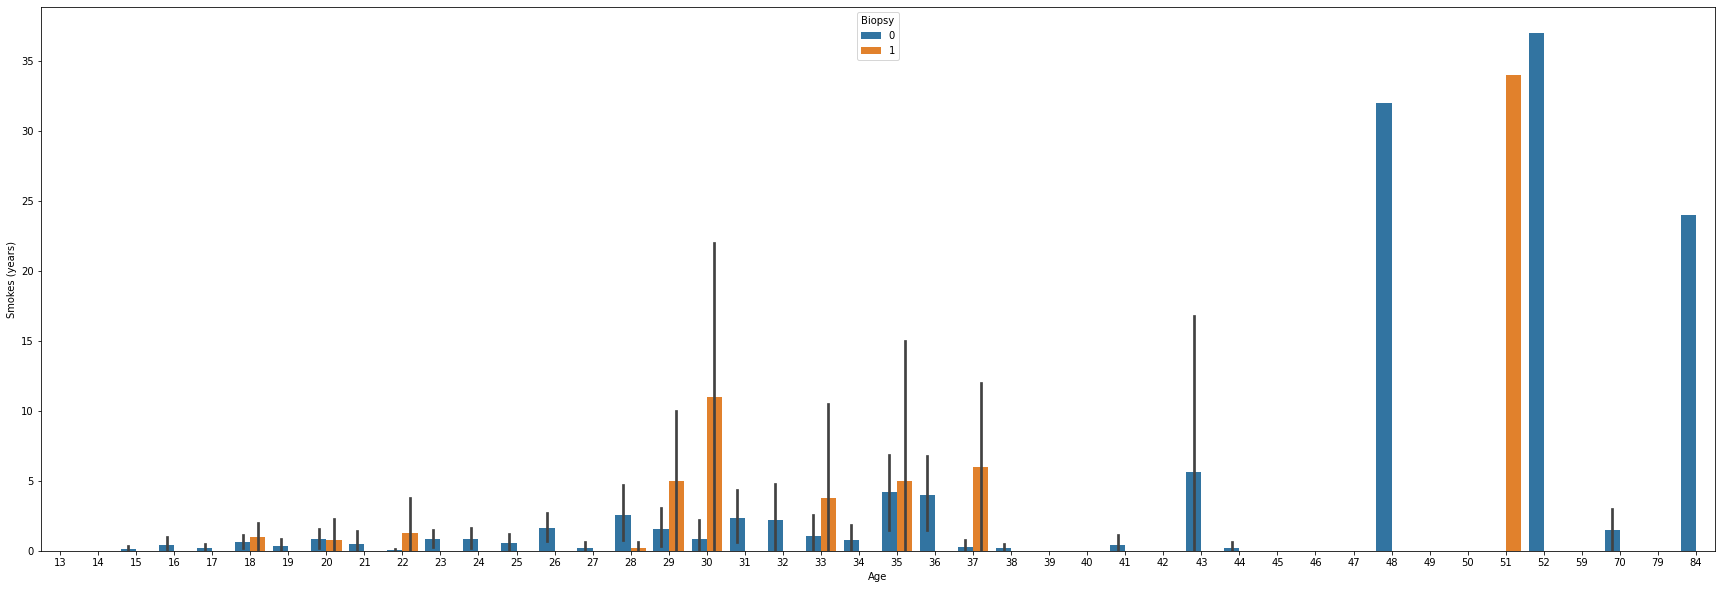

In [83]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Age", y="Smokes (years)", hue="Biopsy",
                    data=cancer_df);

# Train H2O AutoML

In [31]:
#initiate
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5u8oh7xo
  JVM stdout: /tmp/tmp5u8oh7xo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5u8oh7xo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_bsb9nf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [32]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(cancer_df)

#preview
h2o_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Biopsy 
 
 
 18 4 15 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 34 1 17 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 52 5 16 4 1 37 37 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 
 46 3 21 4 0 0 0 1 15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 42 3 23 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 51 3 17 6 1 34 3.4 0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
 26 1 26 3 0 0 0 1 2 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 45 1 20 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 
 44 3 15 2 1 1.26697 2.8 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [33]:
#statistics
h2o_df.describe()

Rows:858
Cols:31




Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Biopsy 
 
 
 type int int int int int real real int real int real int int int int int int int int int int int int int int int int int int int int 
 mins 13.0 1.0 10.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 26.82051282051281 2.5419580419580448 16.995337995337973 2.257575757575757 0.14335664335664336 1.2163923002738926 0.4462781332151515 0.6864801864801865 2.2241426585571125 0.09673659673659674 0.5809673659673666 0.09207459207459208 0.155011655011655 0.05128205128205128 0.0 0.004662004662004662 0.05011655011655012 0.02097902097902098 0.0011655011655011655 0.0011655011655011655 0.0011655011655011655 0.0 0.02097902097902098 0.0011655011655011655 0.002331002331002331 0.08741258741258745 0.02097902097902098 0.01048951048951049 0.02097902097902098 0.027972027972027972 0.0641025641025641 
 maxs 84.0 28.0 32.0 11.0 1.0 37.0 37.0 1.0 30.0 1.0 19.0 1.0 4.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 
 sigma 8.497948065482602 1.6442642822073092 2.7918829988184384 1.400981385307712 0.3506405754432586 4.057973744319563 2.210351363826228 0.46419422433217444 3.520110769369973 0.2957711722154902 1.8132555149585823 0.28929985741160474 0.5296169438520896 0.22070109393249174 0.0 0.06815926148170622 0.21831268815040117 0.1433975861165658 0.03413943709994594 0.03413943709994594 0.03413943709994594 0.0 0.1433975861165658 0.03413943709994594 0.04825227844316598 0.3025447418507477 0.1433975861165658 0.1019391586774784 0.1433975861165658 0.1649888484215437 0.24507841474716066 
 zeros 0 0 0 16 735 722 735 269 269 775 658 779 779 814 858 854 815 840 857 857 857 858 840 857 856 787 840 849 840 834 803 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 18.0 4.0 15.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 1 15.0 1.0 14.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 2 34.0 1.0 17.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 3 52.0 5.0 16.0 4.0 1.0 37.0 37.0 1.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 
 4 46.0 3.0 21.0 4.0 0.0 0.0 0.0 1.0 15.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 5 42.0 3.0 23.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 6 51.0 3.0 17.0 6.0 1.0 34.0 3.4 0.0 0.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 
 7 26.0 1.0 26.0 3.0 0.0 0.0 0.0 1.0 2.0 1.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 8 45.0 1.0 20.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 
 9 44.0 3.0 15.0 2.0 1.0 1.266972909 2.8 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [34]:
#split train and test sets
train, test = h2o_df.split_frame(ratios=[0.75], seed=121)

In [35]:
#define X and y
X = train.columns
y = 'Biopsy'
X.remove(y)

In [36]:
#for binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [37]:
X

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx']

In [38]:
y

'Biopsy'

In [39]:
#initiate
aml = H2OAutoML(balance_classes=True,
                stopping_metric='AUC',     #for classification
                seed=121,
                max_models=20,
                exclude_algos = ["StackedEnsemble"])

#train
aml.train(x=X, 
          y=y, 
          training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20211012_20801_model_2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               34.0  ...        29.0         15.5

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.33985369446958325
RMSE: 0.5829697200280503
LogLoss: 0.9320991854736423
Mean Per-Class Error: 0.05403014920781413
AUC: 0.9802722658052608
AUCPR: 0.975584154580227
Gini: 0.9605445316105217

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0758614971594553: 


0      1   Error            Rate
0      0  554.0   37.0  0.0626    (37.0/591.0)
1      1   27.0  567.0  0.0455    (27.0/594.0)
2  Total  581.0  604.0   0.054   (64.0/1185.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.075861    0.946578   75.0
1                        max f2   0.065601    0.962815   94.0
2                  max f0point5   0.083088    0.943824   63.0
3                  max accuracy   0.075861    0.945992   75.0
4                 max precision   0.475196    1.000000    0.0
5                    max recall   0.043951    1.000000  158.0
6               max specificity   0.475196    1.000000    0.0
7              max absolute_mcc   0.075861    0.892105   75.0
8    max min_per_class_accuracy   0.075861    0.937394   75.0
9   max mean_per_class_accuracy   0.075861    0.945970   75.0
10                      max tns   0.475196  591.000000    0.0
11                      max fns   0.475196  580.000000    0.0
12                      max fps   0.004141  591.000000  399.0
13                      max tps   0.043951  594.000000  158.0
14                      max tnr   0.475196    1.000000    0.0
15                      max fnr   0.475196    0.976431    0.0
16                      max fpr   0.004141    1.000000  399.0
17                      max tpr   0.043951    1.000000  158.0


Gains/Lift Table: Avg response rate: 50.13 %, avg score: 10.83 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011814  ...        99.494949            0.023569
1       2                  0.023629  ...        99.494949            0.047138
2       3                  0.035443  ...        99.494949            0.070707
3       4                  0.048101  ...        95.995038            0.092584
4       5                  0.059916  ...        96.685161            0.116153
5       6                  0.105485  ...        96.303030            0.203687
6       7                  0.150211  ...        97.253433            0.292912
7       8                  0.205907  ...        97.859745            0.404023
8       9                  0.309705  ...        97.320618            0.604343
9      10                  0.407595  ...        94.951586            0.776000
10     11                  0.509705  ...        87.274232            0.891940
11     12                  0.600000  ...        62.738496            0.754773
12     13                  0.699578  ...        42.943305            0.602369
13     14                  0.800000  ...        25.000000            0.401015
14     15                  0.899578  ...        11.163227            0.201354
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.06340683715323558
RMSE: 0.2518071427764423
LogLoss: 0.2504309043389459
Mean Per-Class Error: 0.35636825103830183
AUC: 0.6695123827103523
AUCPR: 0.14613575071468596
Gini: 0.3390247654207046

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07392739207647185: 


0     1   Error           Rate
0      0  519.0  72.0  0.1218   (72.0/591.0)
1      1   26.0  18.0  0.5909    (26.0/44.0)
2  Total  545.0  90.0  0.1543   (98.0/635.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.073927    0.268657   85.0
1                        max f2   0.073927    0.338346   85.0
2                  max f0point5   0.168764    0.284091   10.0
3                  max accuracy   0.409331    0.929134    0.0
4                 max precision   0.168764    0.454545   10.0
5                    max recall   0.004386    1.000000  395.0
6               max specificity   0.409331    0.998308    0.0
7              max absolute_mcc   0.073927    0.209161   85.0
8    max min_per_class_accuracy   0.034213    0.613636  203.0
9   max mean_per_class_accuracy   0.073927    0.643632   85.0
10                      max tns   0.409331  590.000000    0.0
11                      max fns   0.409331   44.000000    0.0
12                      max fps   0.003058  591.000000  399.0
13                      max tps   0.004386   44.000000  395.0
14                      max tnr   0.409331    0.998308    0.0
15                      max fnr   0.409331    1.000000    0.0
16                      max fpr   0.003058    1.000000  399.0
17                      max tpr   0.004386    1.000000  395.0


Gains/Lift Table: Avg response rate:  6.93 %, avg score:  4.04 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011024  ...       312.337662            0.036994
1       2                  0.020472  ...       455.069930            0.100100
2       3                  0.031496  ...       260.795455            0.088256
3       4                  0.040945  ...       177.534965            0.078103
4       5                  0.050394  ...       125.497159            0.067951
5       6                  0.100787  ...       170.596591            0.184741
6       7                  0.151181  ...       170.596591            0.277111
7       8                  0.200000  ...       104.545455            0.224658
8       9                  0.300787  ...        81.342218            0.262883
9      10                  0.400000  ...        53.409091            0.229542
10     11                  0.500787  ...        45.225843            0.243347
11     12                  0.600000  ...        32.575758            0.210006
12     13                  0.699213  ...        17.014742            0.127826
13     14                  0.800000  ...        19.318182            0.166051
14     15                  0.899213  ...         8.680943            0.083872
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_4_valid  cv_5_valid
0                  accuracy   0.836220  ...    0.897638    0.834646
1                       auc   0.675103  ...    0.721739    0.647099
2                       err   0.163780  ...    0.102362    0.165354
3                 err_count  20.800000  ...   13.000000   21.000000
4                  f0point5   0.312973  ...    0.416667    0.322581
5                        f1   0.287807  ...    0.380952    0.363636
6                        f2   0.311856  ...    0.350877    0.416667
7            lift_top_group   5.210257  ...   10.583333    4.884615
8                   logloss   0.252903  ...    0.320550    0.361350
9       max_per_class_error   0.626026  ...    0.666667    0.538462
10                      mcc   0.271165  ...    0.330414    0.281886
11  mean_per_class_accuracy   0.635176  ...    0.644928    0.669366
12     mean_per_class_error   0.364824  ...    0.355072    0.330634
13                      mse   0.063606  ...    0.083208    0.093447
14                   pr_auc   0.193573  ...    0.346703    0.192465
15                precision   0.406746  ...    0.444444    0.300000
16                       r2   0.006619  ...    0.027487   -0.017005
17                   recall   0.401832  ...    0.333333    0.461538
18                     rmse   0.248888  ...    0.288459    0.305690
19              specificity   0.868520  ...    0.956522    0.877193

[20 rows x 8 columns]


Scoring History: 


timestamp  ... training_lift  training_classification_error
0    2021-10-12 02:08:59  ...      1.000000                       0.498734
1    2021-10-12 02:08:59  ...      1.994949                       0.160338
2    2021-10-12 02:08:59  ...      1.994949                       0.147679
3    2021-10-12 02:08:59  ...      1.994949                       0.135865
4    2021-10-12 02:08:59  ...      1.994949                       0.097890
5    2021-10-12 02:08:59  ...      1.994949                       0.076793
6    2021-10-12 02:08:59  ...      1.994949                       0.057384
7    2021-10-12 02:08:59  ...      1.994949                       0.054008

[8 rows x 10 columns]


Variable Importances: 


variable  ...  percentage
0      Hormonal Contraceptives (years)  ...    0.184039
1                                  Age  ...    0.182456
2             First sexual intercourse  ...    0.122911
3                   Num of pregnancies  ...    0.117804
4            Number of sexual partners  ...    0.091245
5                          IUD (years)  ...    0.042357
6                               Dx:HPV  ...    0.037847
7                               Smokes  ...    0.033458
8                       Smokes (years)  ...    0.031010
9                            Dx:Cancer  ...    0.030635
10             Hormonal Contraceptives  ...    0.022479
11                       STDs (number)  ...    0.018878
12                 Smokes (packs/year)  ...    0.017216
13                                STDs  ...    0.012350
14                                  Dx  ...    0.012314
15                            STDs:HIV  ...    0.010591
16                       STDs:syphilis  ...    0.008831
17                 STDs:condylomatosis  ...    0.007541
18           STDs: Number of diagnosis  ...    0.005858
19  STDs:vulvo-perineal condylomatosis  ...    0.005421

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


# Leaderboard Exploration

In [40]:
#leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 GBM_grid_1_AutoML_1_20211012_20801_model_2 0.669512 0.250431 0.146136 0.356368 0.251807 0.0634068 
 GBM_1_AutoML_1_20211012_20801 0.655188 0.251807 0.105567 0.345581 0.255729 0.0653971 
 GBM_3_AutoML_1_20211012_20801 0.652034 0.277189 0.16919 0.389132 0.253213 0.064117 
 XGBoost_3_AutoML_1_20211012_20801 0.646343 0.26155 0.100594 0.340505 0.263109 0.0692265 
 DeepLearning_grid_3_AutoML_1_20211012_20801_model_1 0.638729 0.569069 0.116492 0.354522 0.2911 0.0847392 
 DRF_1_AutoML_1_20211012_20801 0.637114 0.371699 0.168929 0.434837 0.254275 0.0646558 
 GBM_grid_1_AutoML_1_20211012_20801_model_1 0.631711 0.249374 0.0874604 0.406764 0.254482 0.0647613 
 XGBoost_2_AutoML_1_20211012_20801 0.606926 0.25781 0.0864113 0.387383 0.259352 0.0672633 
 DeepLearning_grid_2_AutoML_1_20211012_20801_model_1 0.603542 0.55495 0.0969756 0.43253 0.286778 0.0822417 
 GBM_2_AutoML_1_20211012_20801 0.602196 0.282098 0.122125 0.425646 0.255073 0.0650622 
 DeepLearning_grid_1_AutoML_1_20211012_20801_model_1 0.589159 0.479129 0.112932 0.401438 0.311827 0.0972358 
 GBM_4_AutoML_1_20211012_20801 0.582583 0.335053 0.158828 0.409072 0.254169 0.0646017 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_3 0.578007 0.255817 0.0849215 0.411591 0.257026 0.0660621 
 DeepLearning_1_AutoML_1_20211012_20801 0.574623 0.352308 0.1093 0.420685 0.284178 0.0807569 
 XRT_1_AutoML_1_20211012_20801 0.571989 0.271307 0.152709 0.434837 0.255996 0.0655338 
 GBM_5_AutoML_1_20211012_20801 0.546762 0.304446 0.102637 0.455026 0.257435 0.0662726 
 GLM_1_AutoML_1_20211012_20801 0.54332 0.247843 0.11052 0.427453 0.252659 0.0638368 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_2 0.485656 0.255642 0.0689404 0.471985 0.254975 0.0650121 
 XGBoost_1_AutoML_1_20211012_20801 0.479599 0.258416 0.0624893 0.456853 0.256214 0.0656454 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_1 0.440048 0.258693 0.0579042 0.490578 0.255909 0.0654892

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 GBM_grid_1_AutoML_1_20211012_20801_model_2 0.669512 0.250431 0.146136 0.356368 0.251807 0.0634068 211 0.029763 GBM 
 GBM_1_AutoML_1_20211012_20801 0.655188 0.251807 0.105567 0.345581 0.255729 0.0653971 654 0.018161 GBM 
 GBM_3_AutoML_1_20211012_20801 0.652034 0.277189 0.16919 0.389132 0.253213 0.064117 345 0.019029 GBM 
 XGBoost_3_AutoML_1_20211012_20801 0.646343 0.26155 0.100594 0.340505 0.263109 0.0692265 321 0.012648 XGBoost 
 DeepLearning_grid_3_AutoML_1_20211012_20801_model_1 0.638729 0.569069 0.116492 0.354522 0.2911 0.0847392 49726 0.073762 DeepLearning 
 DRF_1_AutoML_1_20211012_20801 0.637114 0.371699 0.168929 0.434837 0.254275 0.0646558 740 0.031714 DRF 
 GBM_grid_1_AutoML_1_20211012_20801_model_1 0.631711 0.249374 0.0874604 0.406764 0.254482 0.0647613 266 0.020341 GBM 
 XGBoost_2_AutoML_1_20211012_20801 0.606926 0.25781 0.0864113 0.387383 0.259352 0.0672633 251 0.016395 XGBoost 
 DeepLearning_grid_2_AutoML_1_20211012_20801_model_1 0.603542 0.55495 0.0969756 0.43253 0.286778 0.0822417 30741 0.042493 DeepLearning 
 GBM_2_AutoML_1_20211012_20801 0.602196 0.282098 0.122125 0.425646 0.255073 0.0650622 329 0.022958 GBM 
 DeepLearning_grid_1_AutoML_1_20211012_20801_model_1 0.589159 0.479129 0.112932 0.401438 0.311827 0.0972358 21604 0.02128 DeepLearning 
 GBM_4_AutoML_1_20211012_20801 0.582583 0.335053 0.158828 0.409072 0.254169 0.0646017 518 0.026106 GBM 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_3 0.578007 0.255817 0.0849215 0.411591 0.257026 0.0660621 189 0.030806 XGBoost 
 DeepLearning_1_AutoML_1_20211012_20801 0.574623 0.352308 0.1093 0.420685 0.284178 0.0807569 359 0.019907 DeepLearning 
 XRT_1_AutoML_1_20211012_20801 0.571989 0.271307 0.152709 0.434837 0.255996 0.0655338 463 0.021755 DRF 
 GBM_5_AutoML_1_20211012_20801 0.546762 0.304446 0.102637 0.455026 0.257435 0.0662726 340 0.018155 GBM 
 GLM_1_AutoML_1_20211012_20801 0.54332 0.247843 0.11052 0.427453 0.252659 0.0638368 303 0.009209 GLM 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_2 0.485656 0.255642 0.0689404 0.471985 0.254975 0.0650121 133 0.008138 XGBoost 
 XGBoost_1_AutoML_1_20211012_20801 0.479599 0.258416 0.0624893 0.456853 0.256214 0.0656454 410 0.015195 XGBoost 
 XGBoost_grid_1_AutoML_1_20211012_20801_model_1 0.440048 0.258693 0.0579042 0.490578 0.255909 0.0654892 163 0.008383 XGBoost

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20211012_20801_model_2


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14759260908658142: 


0    1   Error           Rate
0      0  207.0  5.0  0.0236    (5.0/212.0)
1      1    9.0  2.0  0.8182     (9.0/11.0)
2  Total  216.0  7.0  0.0628   (14.0/223.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

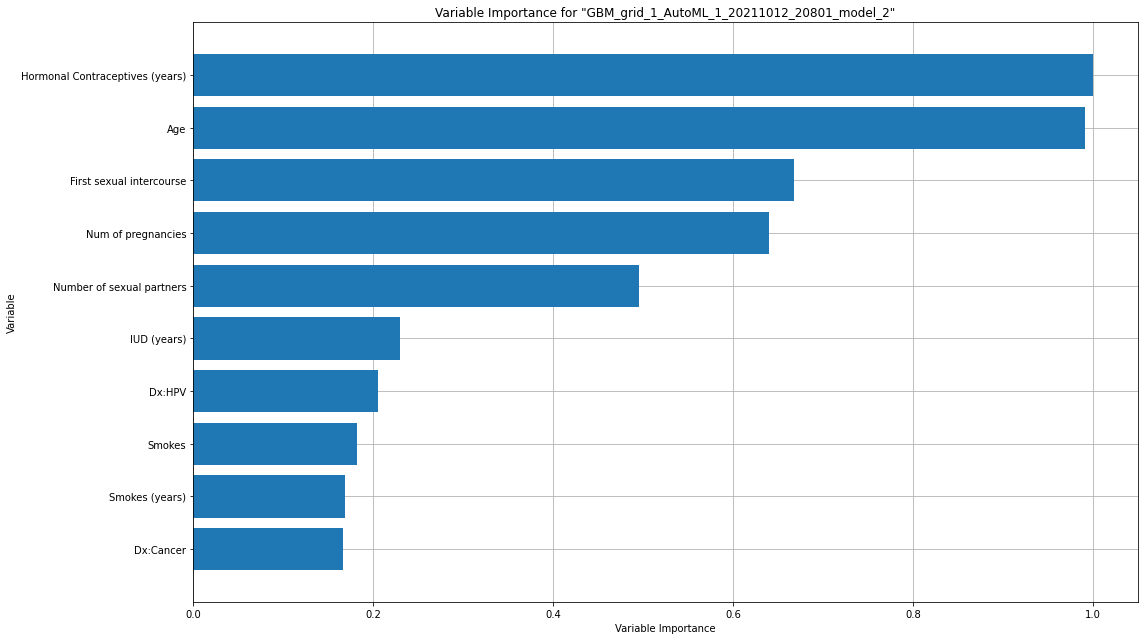

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

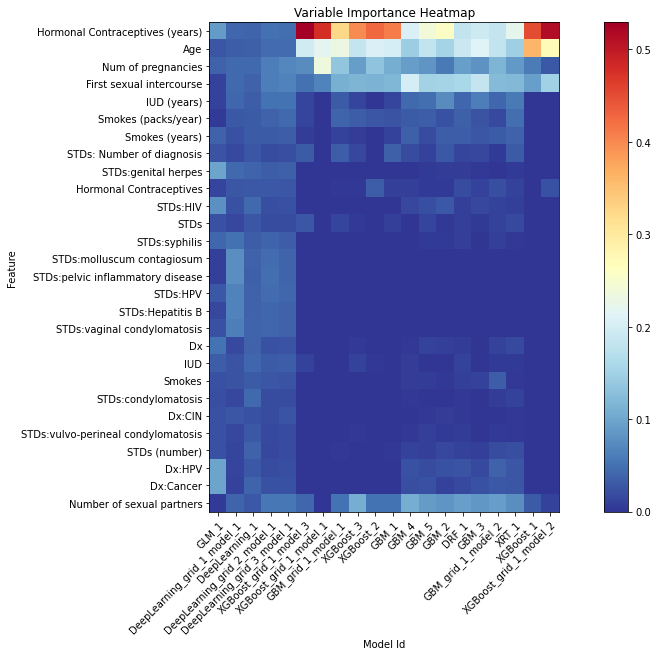

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

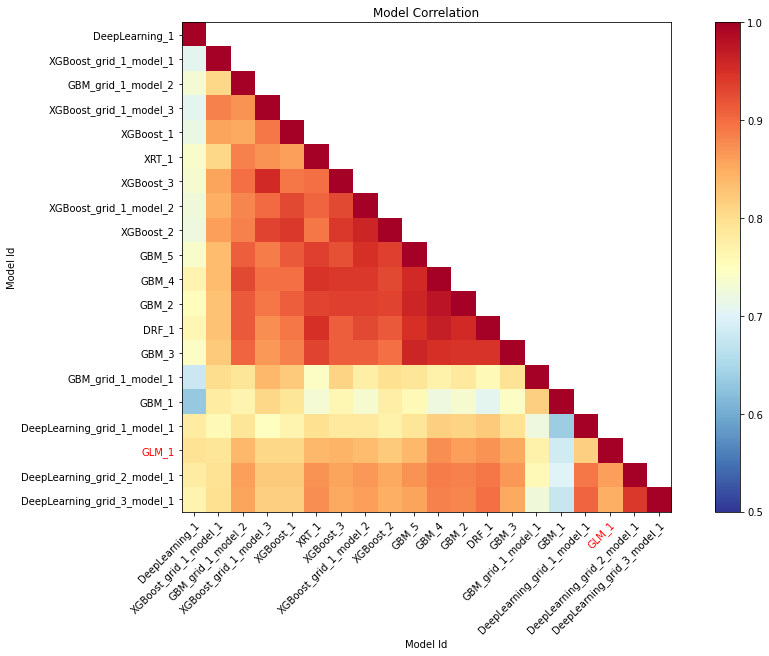

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

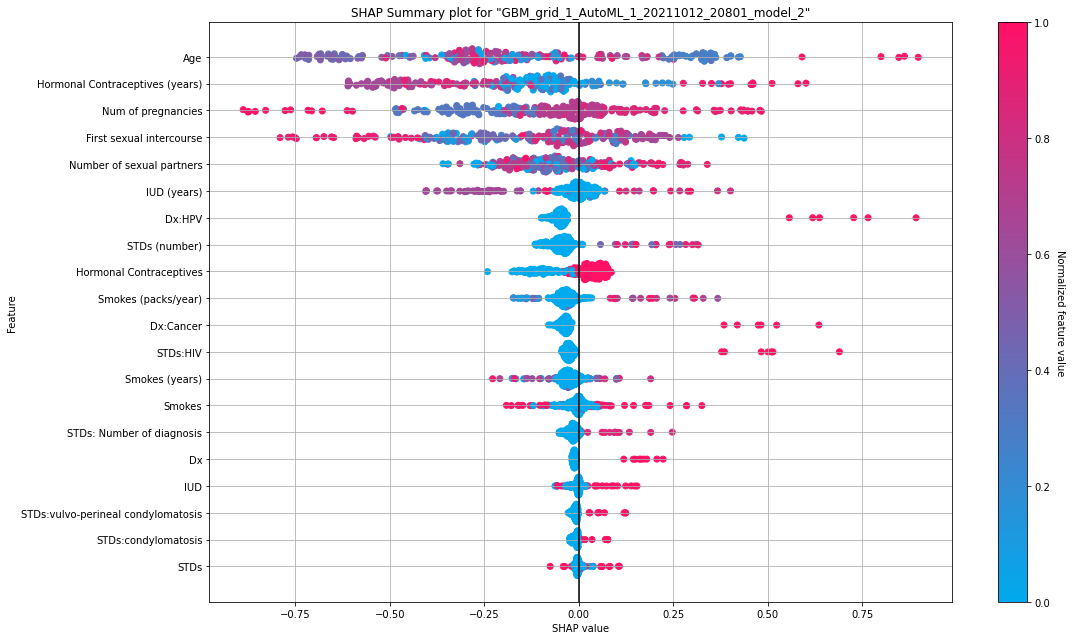

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

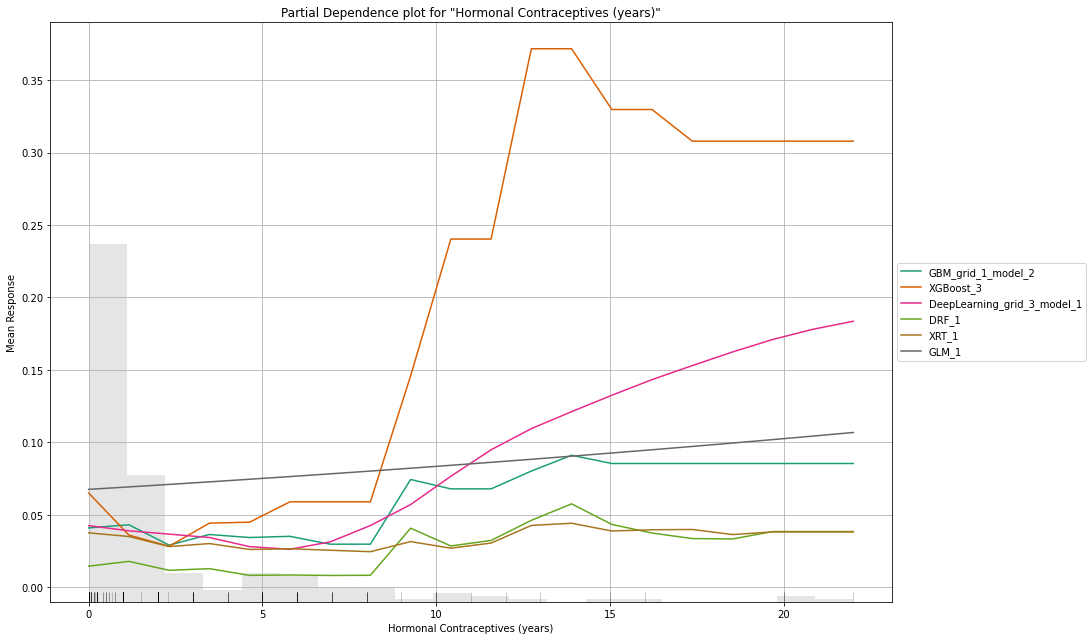

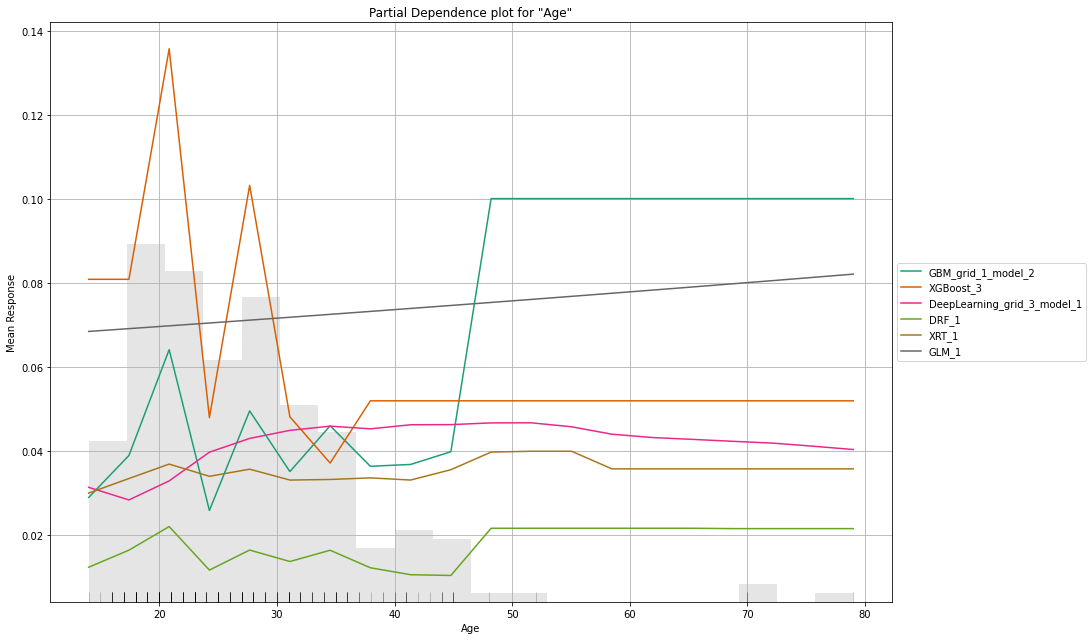

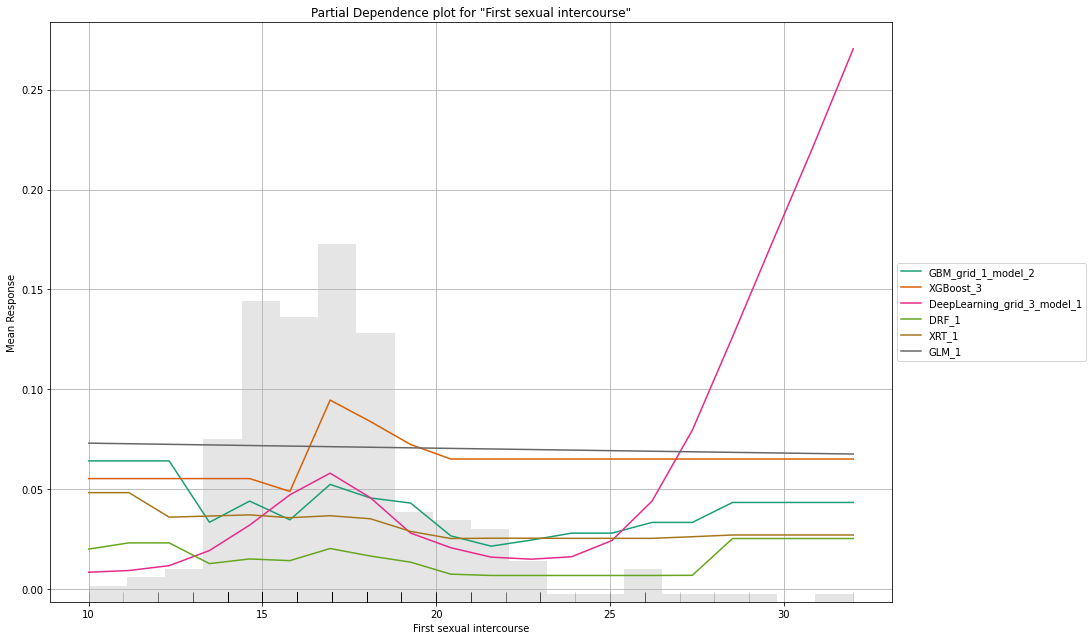

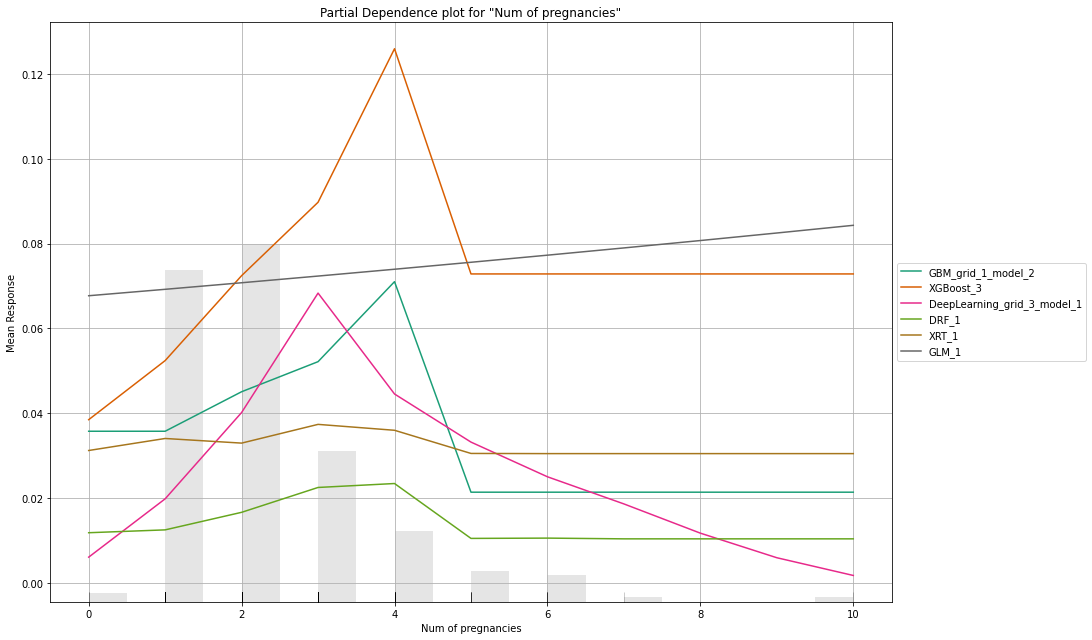

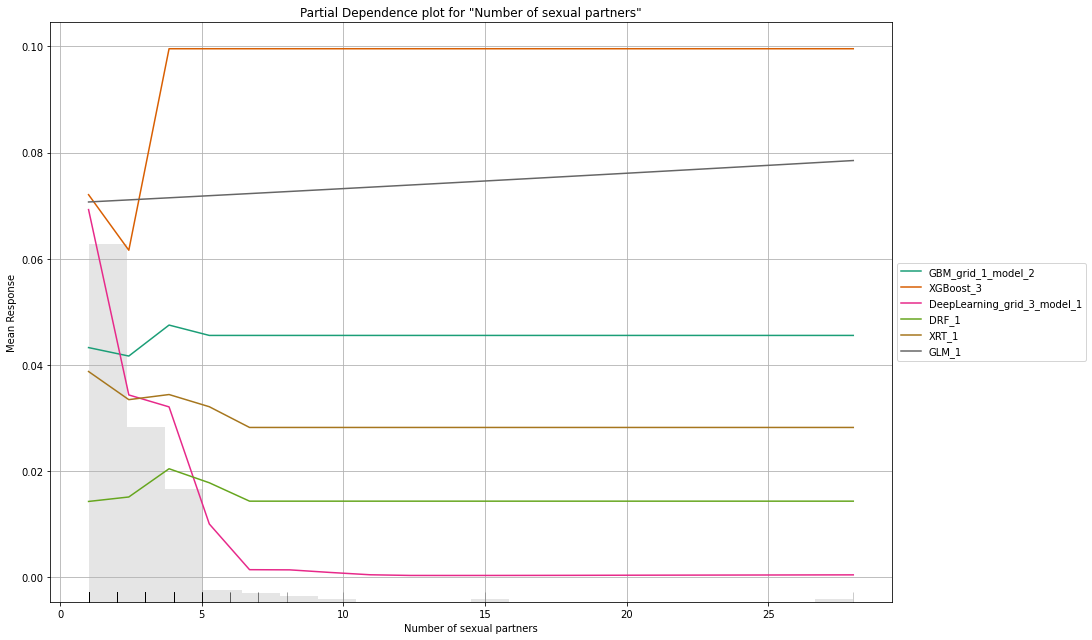

In [41]:
#compare all models
exm = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20211012_20801_model_2


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14759260908658142: 


0    1   Error           Rate
0      0  207.0  5.0  0.0236    (5.0/212.0)
1      1    9.0  2.0  0.8182     (9.0/11.0)
2  Total  216.0  7.0  0.0628   (14.0/223.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

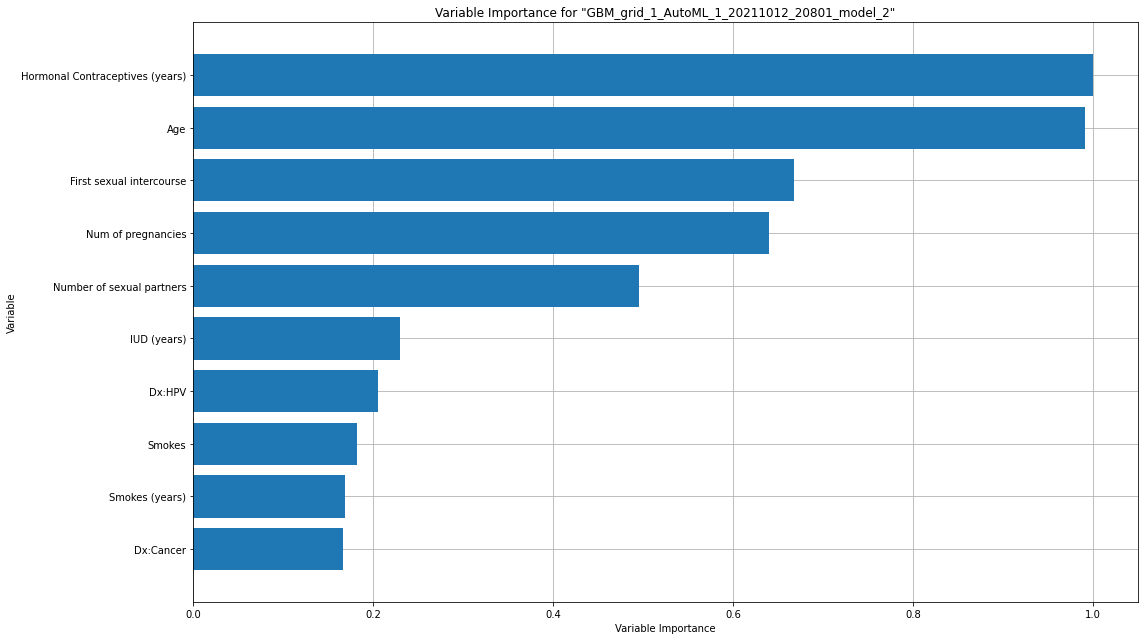

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

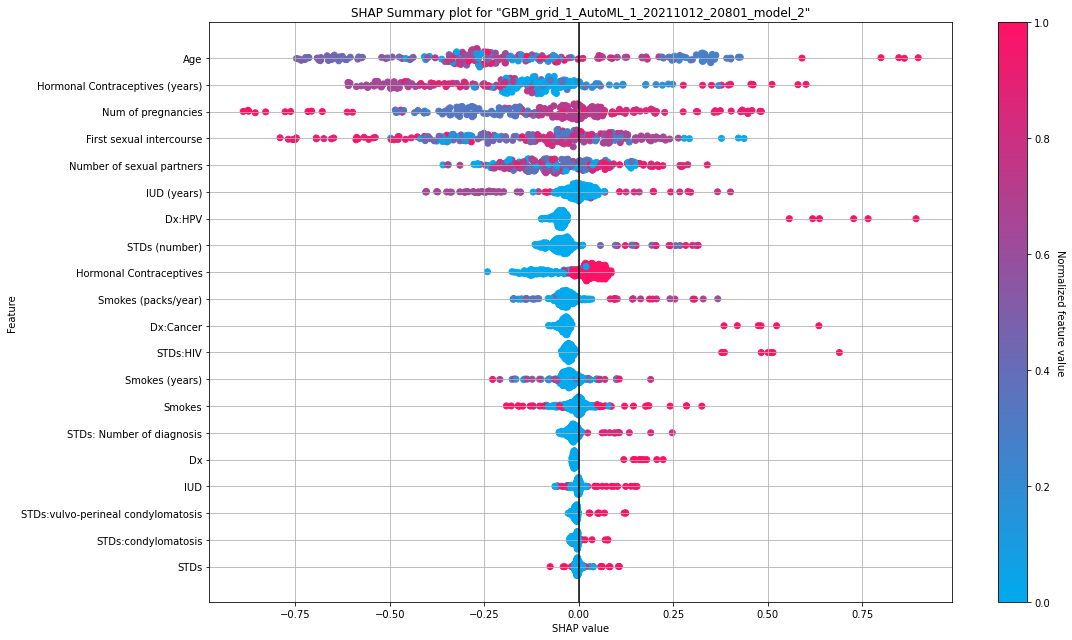

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

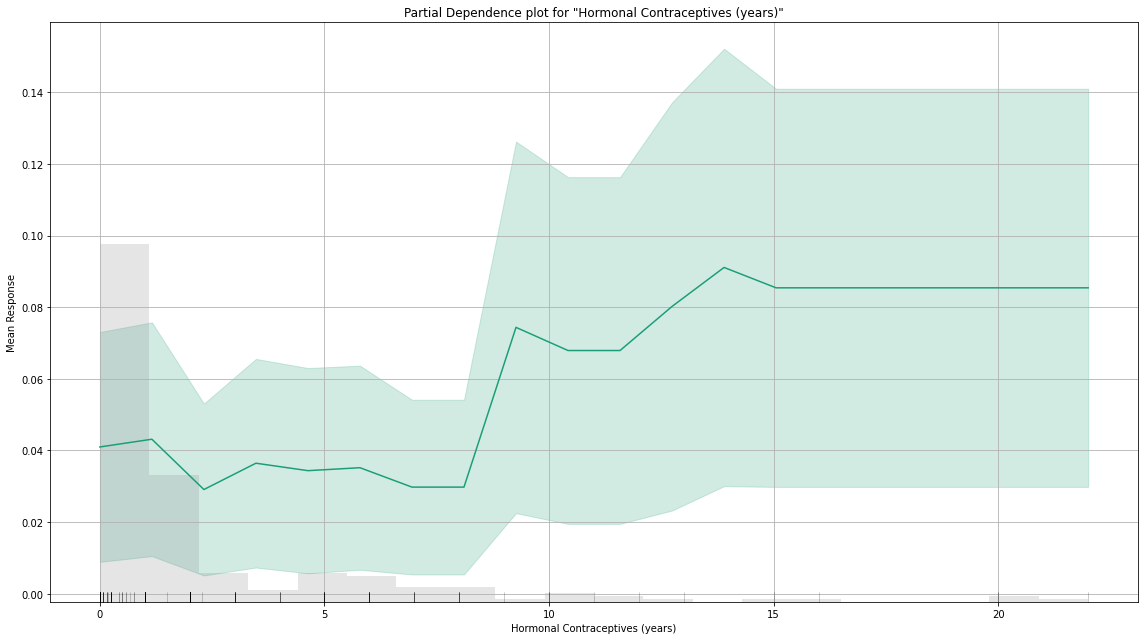

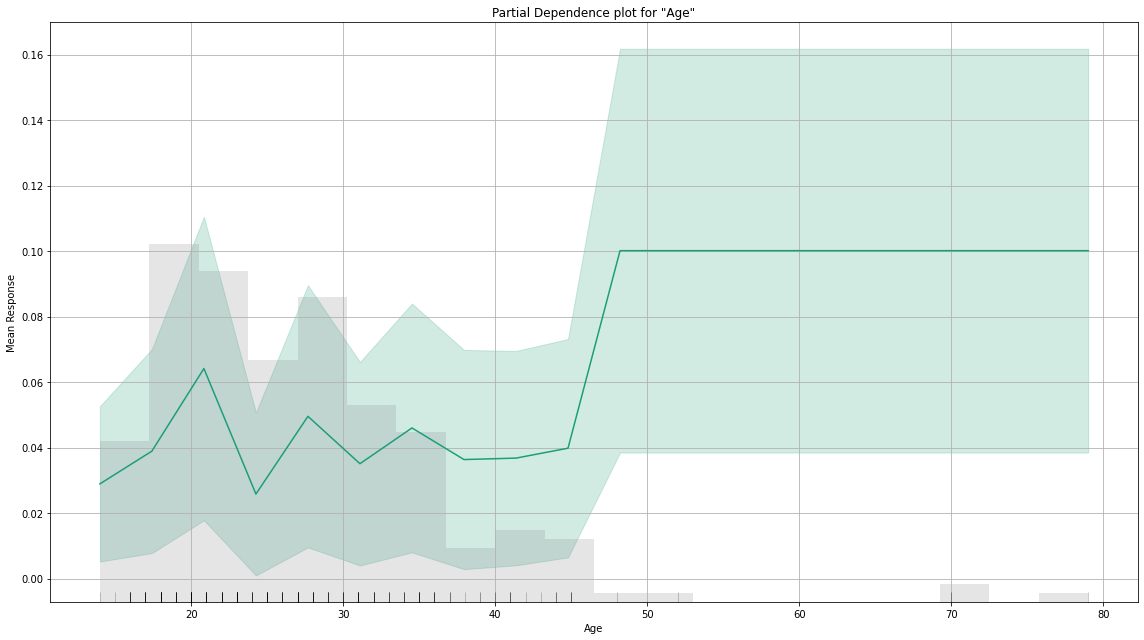

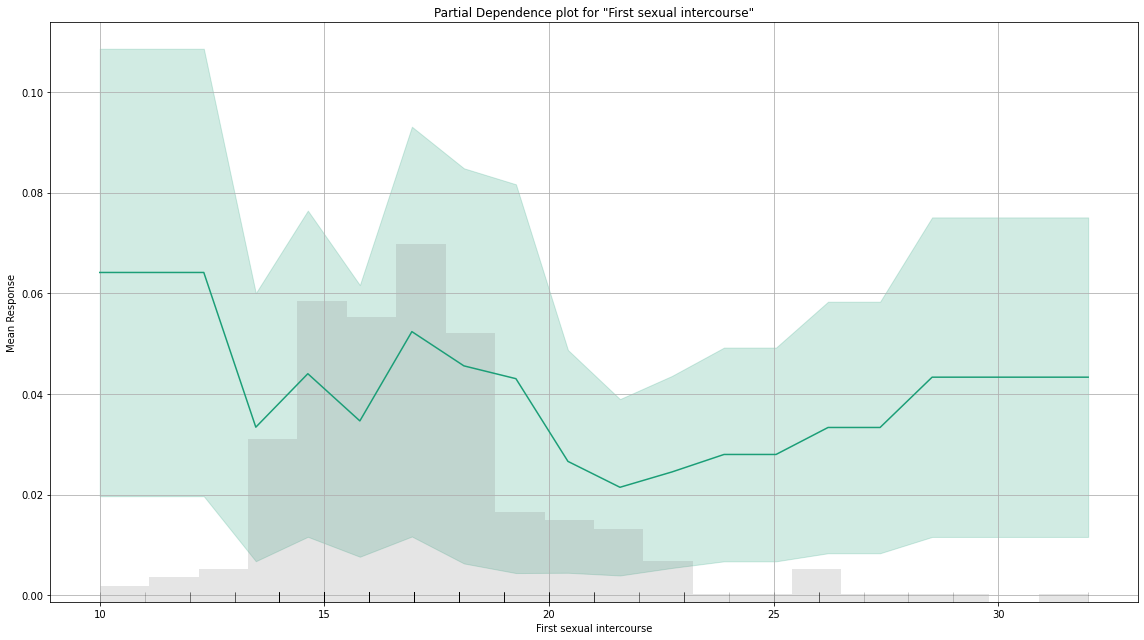

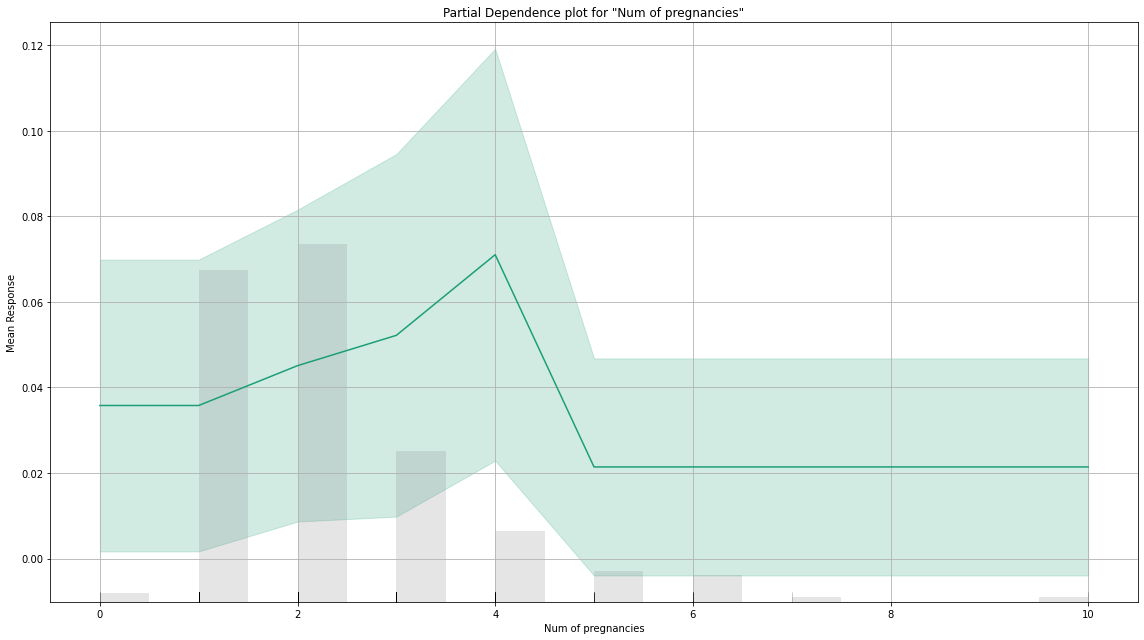

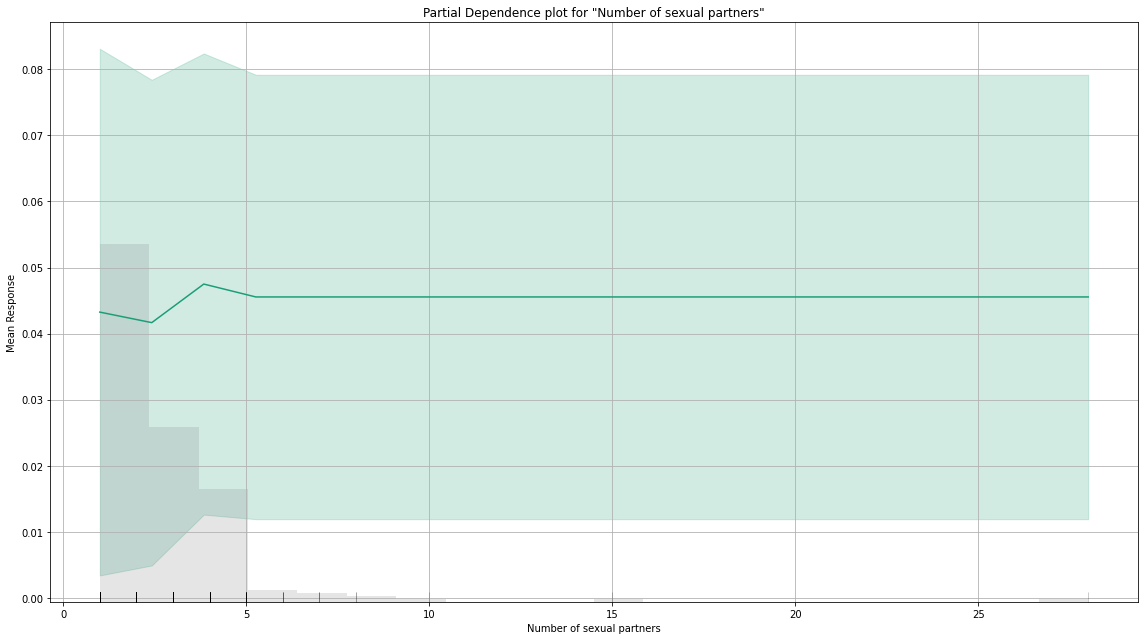

In [42]:
#explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

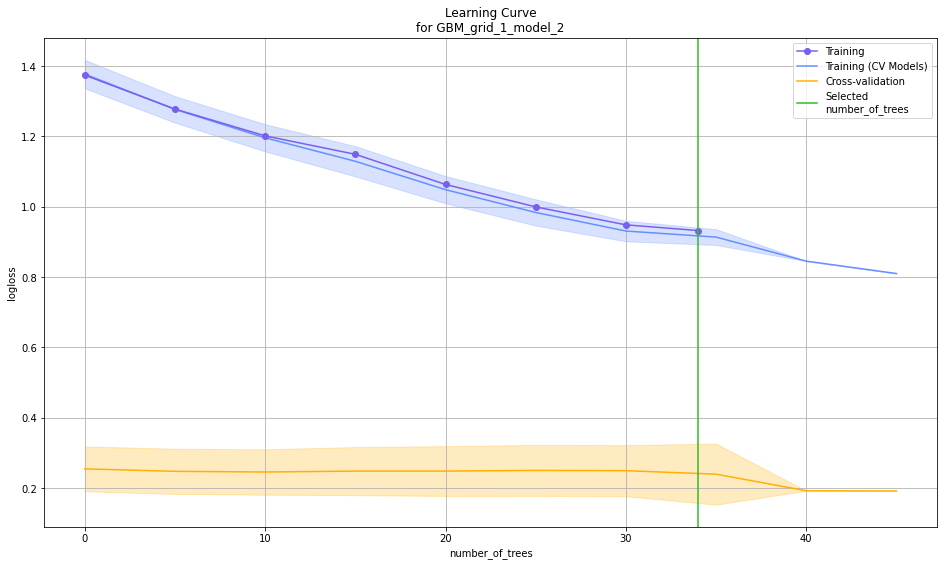

In [43]:
#learning curve
aml.leader.learning_curve_plot();

In [44]:
#make prediction
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [45]:
#combine the prediction with the test dataset
df = test.cbind(preds)

#preview
df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Biopsy predict p0 p1 
 
 
 15 1 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.991485 0.00851489 
 42 3 23 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.987376 0.012624 
 44 3 26 4 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.972266 0.0277339 
 27 1 17 3 0 0 0 1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.946855 0.0531448 
 45 4 14 6 0 0 0 1 10 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.931542 0.0684585 
 41 4 21 3 0 0 0 1 0.25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.979239 0.0207615 
 37 6 26 1 0 0 0 1 0.25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.96945 0.0305495 
 41 3 17 3 0 0 0 1 22 1 0.58 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.911371 0.0886294 
 36 2 20 3 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.981716 0.0182835 
 37 2 18 2 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0.929434 0.0705656

In [46]:
df = h2o.as_list(df)

In [47]:
preds = df[['Biopsy', 'predict']].head(20)
preds

Biopsy  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        0
5        0        0
6        0        0
7        0        1
8        0        0
9        1        0
10       0        1
11       0        0
12       0        0
13       0        0
14       0        0
15       0        1
16       0        0
17       0        0
18       0        0
19       0        0

In [48]:
df.to_csv('df.csv')
preds.to_csv('preds.csv')

# Use LIME to explain H2O Models

In [49]:
!pip install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=236f28e85c42f6790fa60a98a209e510a478b7a008a437f08322685e83c51a67
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [50]:
feature_names = train.columns[0: -1]
feature_names

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx']

In [51]:
train_features_numpy = train[feature_names].as_data_frame().values
train_features_numpy

array([[18.,  4., 15., ...,  0.,  0.,  0.],
       [34.,  1., 17., ...,  0.,  0.,  0.],
       [52.,  5., 16., ...,  0.,  1.,  0.],
       ...,
       [25.,  2., 17., ...,  0.,  0.,  0.],
       [33.,  2., 24., ...,  0.,  0.,  0.],
       [29.,  2., 20., ...,  0.,  0.,  0.]])

In [52]:
#define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train_features_numpy, 
                                                   feature_names = feature_names,
                                                   mode='classification')

In [53]:
#https://sefiks.com/2019/09/19/explaining-h2o-models-with-lime/

def findPrediction(instance):

 #instance will be in type of numpy
 df = pd.DataFrame(data = instance, columns = feature_names)
 hf = h2o.H2OFrame(df)
 predictions = aml.leader.predict(hf).as_data_frame()
 
 #here predictions object is 3 columned data frame. 1st column is class prediction and others are probabilities
 #lime needs just prediction probabilities
 
 predictions = predictions.iloc[:,1:].values
 return predictions

In [54]:
idx = 100
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

In [55]:
test_numpy

array([45.,  2., 18.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [56]:
exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [57]:
exp.show_in_notebook(show_table=True, show_all=True)

In [58]:
idx = 120
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [59]:
idx = 150
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy, 
                                 findPrediction, 
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
